___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [8]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 1, 1)


In [107]:
#google finance api has been depriciated and so used iex
BAC = data.DataReader("BAC", 'iex', start, end)
C = data.DataReader("C",'iex',start,end)
GS = data.DataReader("GS",'iex',start,end)
JPM = data.DataReader("JPM",'iex',start,end)
MS = data.DataReader("MS",'iex',start,end)
WFC = data.DataReader("WFC",'iex',start,end)


In [2]:
#in order to match results, importing file provided by udemy which has data from google finance
df = pd.read_pickle('all_banks')
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [108]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [109]:
bank_stocks_concat = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)
bank_stocks_concat.columns.names = ['Bank Ticker','Stock Info']
bank_stocks_concat.head()

Bank Ticker      BAC                                              C           \
Stock Info      open     high      low    close     volume     open     high   
date                                                                           
2014-03-26   16.1511  16.1697  15.9652  15.9652   97573715  47.7739  47.8212   
2014-03-27   16.0582  16.2533  15.6400  15.8072  175139455  44.8430  45.5710   
2014-03-28   15.8769  15.9374  15.6586  15.7794   79909509  45.1172  45.1455   
2014-03-31   15.9374  16.0489  15.9095  15.9838   62115774  44.9375  45.2872   
2014-04-01   16.0582  16.1697  16.0396  16.1139   57423776  45.1172  45.6182   

Bank Ticker                                 ...          MS                    \
Stock Info       low    close     volume    ...        open     high      low   
date                                        ...                                 
2014-03-26   46.9655  47.4241   36784712    ...     28.9006  29.0095  28.3198   
2014-03-27   44.5404  44.8619  112601033    ...     28.2563  28.5376  27.7573   
2014-03-28   44.4648  44.6728   39796005    ...     28.0748  28.5013  27.8934   
2014-03-31   44.8808  45.0037   25651026    ...     28.2926  28.5467  28.1021   
2014-04-01   45.0510  45.1928   26813780    ...     28.4650  28.4922  28.1293   

Bank Ticker                         WFC                                       
Stock Info     close    volume     open     high      low    close    volume  
date                                                                          
2014-03-26   28.3289  11233797  42.5585  42.5671  41.9269  41.9615  17399843  
2014-03-27   28.0385  13638426  42.8354  43.0776  42.0913  42.4806  29075059  
2014-03-28   28.0476   8081149  42.5152  42.9240  42.4374  42.6450  15008037  
2014-03-31   28.2835   9421645  43.0430  43.1814  42.7921  43.0343  17901782  
2014-04-01   28.3198  11583595  43.1555  43.1987  42.8267  43.0603  16398766  

[5 rows x 30 columns]

** Set the column name levels (this is filled out for you):**

In [9]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

In [10]:
df.xs('Close',axis=1,level=1).max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [3]:
returns = df.xs('Close',axis=1,level=1).pct_change()
returns.head()

Bank Ticker       BAC         C        GS       JPM        MS       WFC
Date                                                                   
2006-01-03        NaN       NaN       NaN       NaN       NaN       NaN
2006-01-04  -0.010620 -0.018462 -0.013812 -0.014183  0.000686 -0.011599
2006-01-05   0.001288  0.004961 -0.000393  0.003029  0.002742 -0.000951
2006-01-06  -0.001501  0.000000  0.014169  0.007046  0.001025  0.005714
2006-01-09   0.000644 -0.004731  0.012030  0.016242  0.010586  0.000000

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [11]:
returns = df.xs('Close',axis=1,level=1).pct_change()
returns.head()

Bank Ticker       BAC         C        GS       JPM        MS       WFC
Date                                                                   
2006-01-03        NaN       NaN       NaN       NaN       NaN       NaN
2006-01-04  -0.010620 -0.018462 -0.013812 -0.014183  0.000686 -0.011599
2006-01-05   0.001288  0.004961 -0.000393  0.003029  0.002742 -0.000951
2006-01-06  -0.001501  0.000000  0.014169  0.007046  0.001025  0.005714
2006-01-09   0.000644 -0.004731  0.012030  0.016242  0.010586  0.000000

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [13]:
returns.loc['2011-05-06':'2011-05-12']

Bank Ticker       BAC         C        GS       JPM        MS       WFC
Date                                                                   
2011-05-06   0.000813 -0.899107 -0.002061 -0.002878  0.003978  0.004266
2011-05-09  -0.010561  8.769912 -0.006529 -0.001776 -0.006339 -0.001416
2011-05-10   0.008210  0.000906  0.008584  0.004448  0.015152  0.011343
2011-05-11  -0.002443 -0.028959 -0.016755 -0.020593 -0.033386 -0.012969
2011-05-12  -0.004082 -0.011650 -0.034690 -0.003165 -0.004063  0.002486

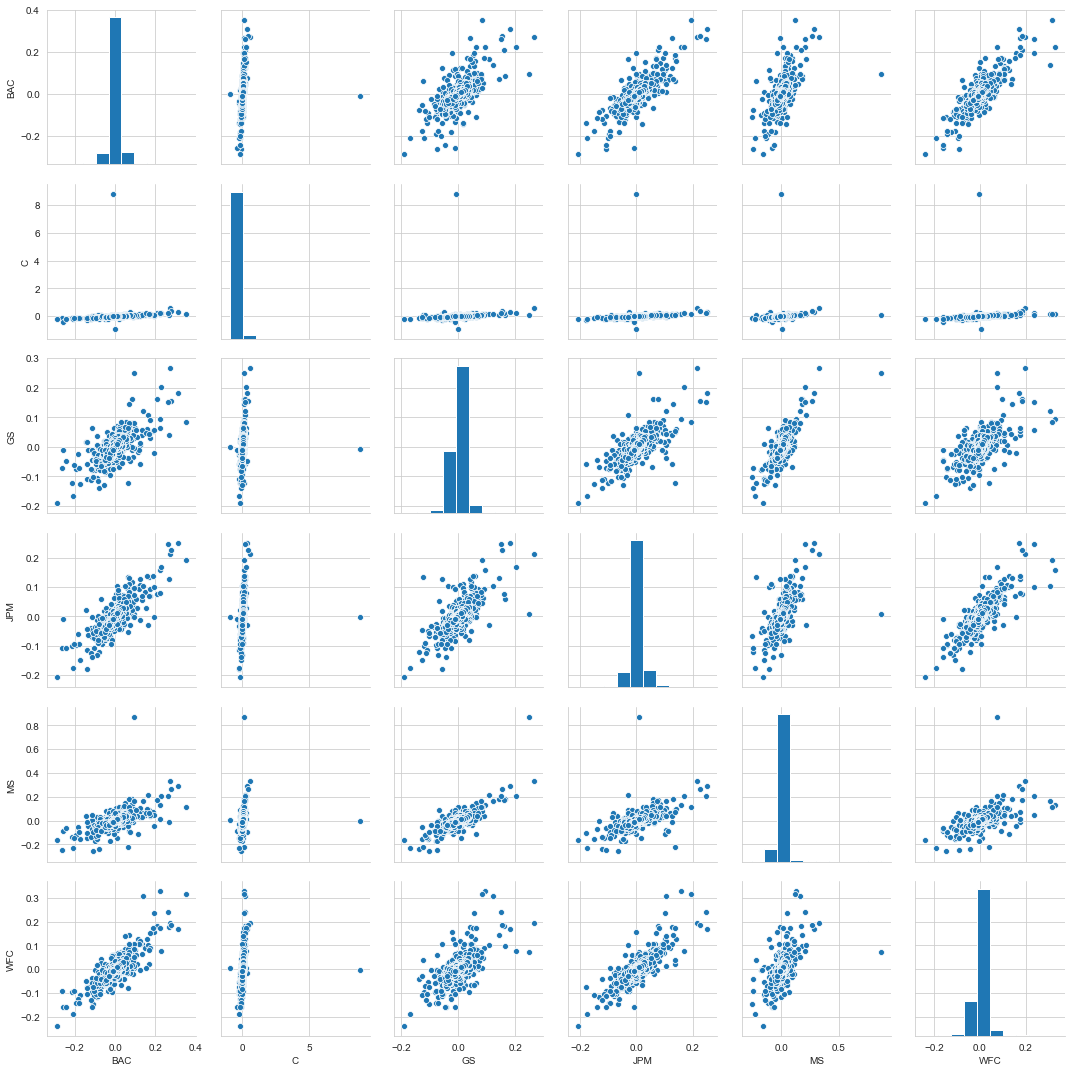

In [110]:
import seaborn as sns
sns.pairplot(data=returns[1:])

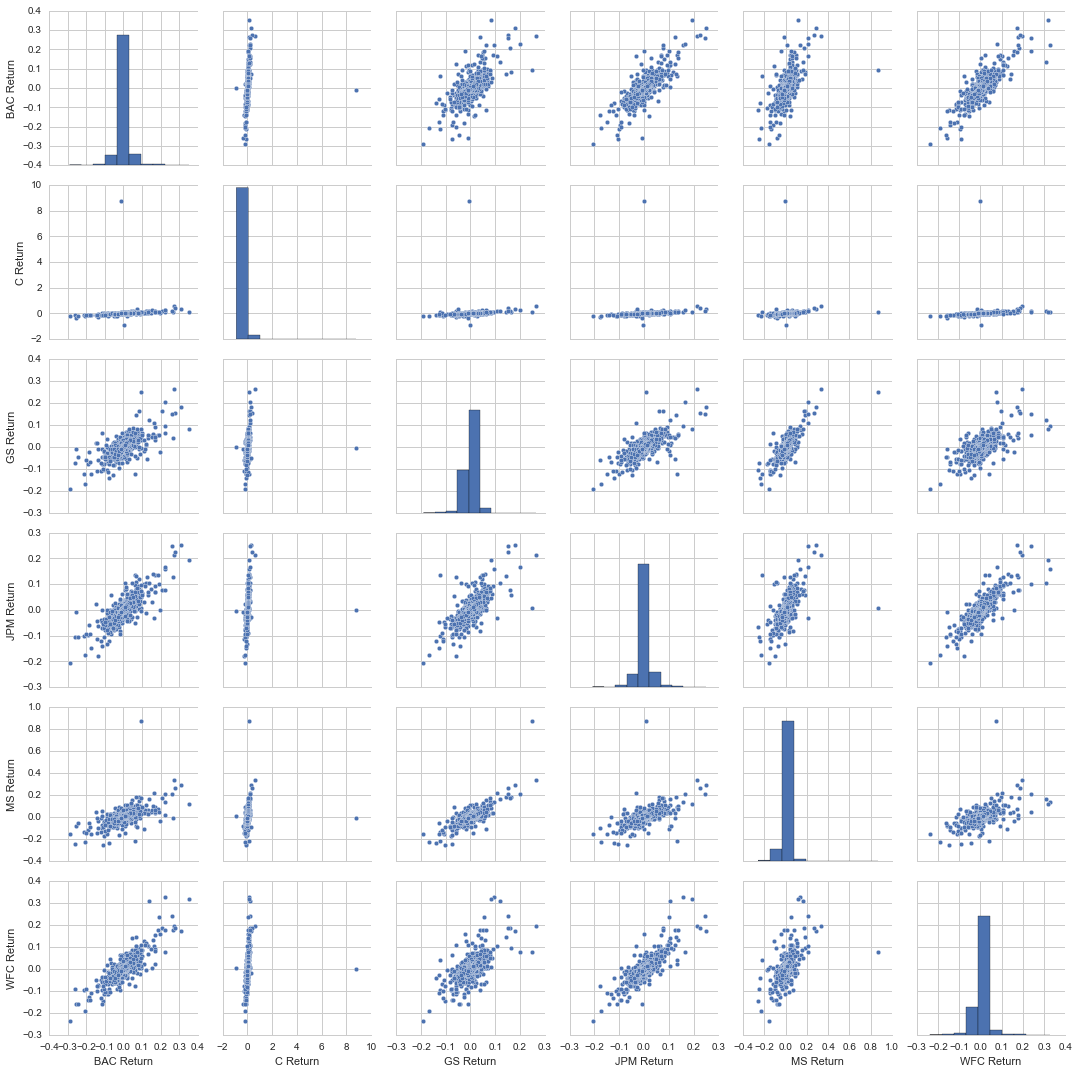

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [13]:
returns.idxmin()

Bank Ticker
BAC   2009-01-20
C     2011-05-06
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

In [14]:
returns.idxmax()

Bank Ticker
BAC   2009-04-09
C     2011-05-09
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [15]:
returns.std()

Bank Ticker
BAC    0.036650
C      0.179969
GS     0.025346
JPM    0.027656
MS     0.037820
WFC    0.030233
dtype: float64

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [16]:
returns[(returns.index>='2015-01-01')&(returns.index<='2015-12-31')].std()

Bank Ticker
BAC    0.016163
C      0.015289
GS     0.014046
JPM    0.014017
MS     0.016249
WFC    0.012591
dtype: float64

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

In [17]:
from matplotlib import rcParams
rcParams['patch.force_edgecolor'] = True
rcParams['patch.facecolor'] = 'green'
rcParams['patch.edgecolor'] = 'white'

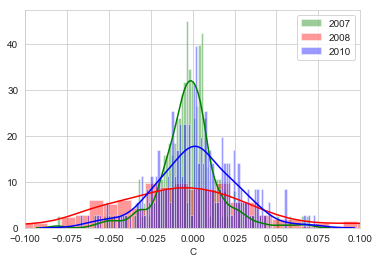

In [28]:
sns.set_style('whitegrid')
MS_dataframe_2007 = returns[(returns.index>='2007-01-01')&(returns.index<='2007-12-31')]['C']
MS_dataframe_2008 = returns[(returns.index>='2008-01-01')&(returns.index<='2008-12-31')]['C']
MS_dataframe_2010 = returns[(returns.index>='2010-01-01')&(returns.index<='2010-12-31')]['C']
ax = sns.distplot(MS_dataframe_2007,bins=100,color='green',label='2007')
sns.distplot(MS_dataframe_2008,bins=100,color='RED',label='2008')
sns.distplot(MS_dataframe_2010,bins=100,color='BLUE',label='2010')
ax.set_xlim(-0.1,0.1)
ax.legend()
#Standard deviation is a measure of risk that an investment will not meet the expected return in a given period.
#The smaller an investment's standard deviation, the less volatile (and hence risky) it is.
#The larger the standard deviation, the more dispersed those returns are and thus the riskier the investment is.

(-20, 300)

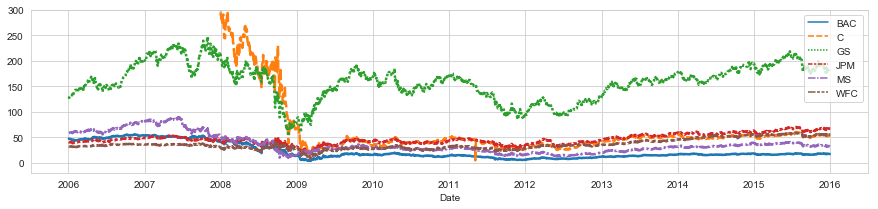

In [44]:
plt.figure(figsize=(15,3))
Closing_dataframe = df.xs('Close',axis=1,level=1)
ax = sns.lineplot(data=Closing_dataframe, linewidth=2.5)
ax.set_ylim(-20,300)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

In [105]:
returns_2011_C = returns[(returns.index>='2011-1-1')&(returns.index<='2011-12-31')]['C']
returns_2011_C.idxmax()

Timestamp('2011-05-09 00:00:00')

Text(0.5, 1.0, 'GS returns')

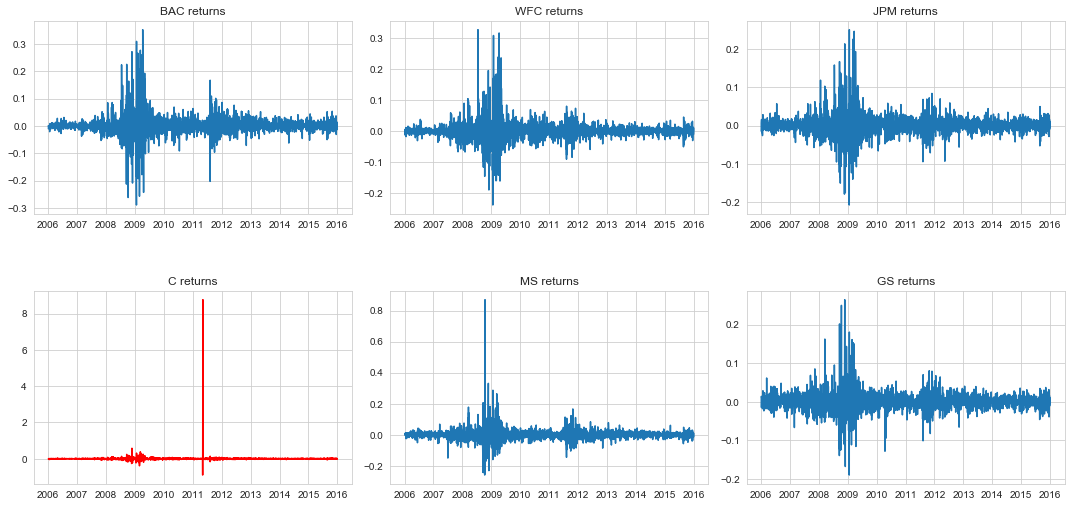

In [70]:
f, axes = plt.subplots(2, 3, figsize=(15, 7), sharex=False)
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
#Closing_dataframe = df.xs('Close',axis=1,level=1)
ax1 = sns.lineplot(data=returns['BAC'],ax=axes[0, 0])
ax1.set_title('BAC returns')
ax2 = sns.lineplot(data=returns['WFC'],ax=axes[0, 1])
ax2.set_title('WFC returns')
ax3 = sns.lineplot(data=returns['JPM'],ax=axes[0, 2])
ax3.set_title('JPM returns')
ax4 = sns.lineplot(data=returns['C'],ax=axes[1, 0],color='r')
ax4.set_title('C returns')
ax5 = sns.lineplot(data=returns['MS'],ax=axes[1, 1])
ax5.set_title('MS returns')
ax6 = sns.lineplot(data=returns['GS'],ax=axes[1, 2])
ax6.set_title('GS returns')


____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import plotly.plotly as py
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [111]:
close_price = df.xs('Close',axis=1,level=1)
close_price.iplot(kind='line')

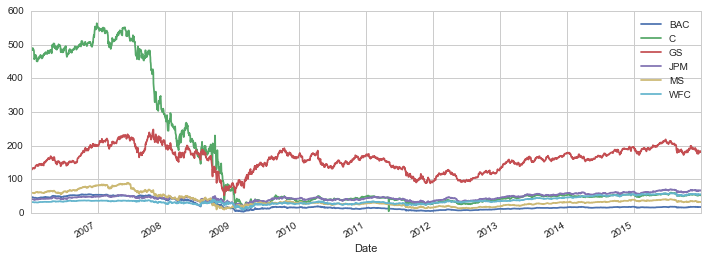

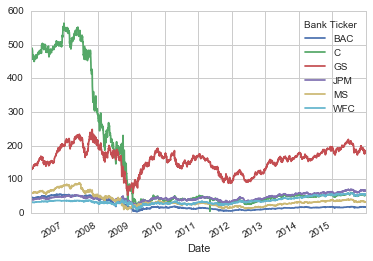

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

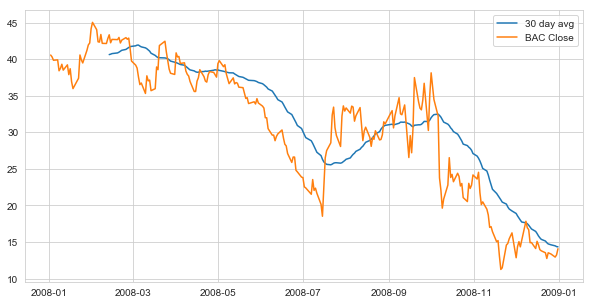

In [97]:
close_price_2008 = close_price[((close_price.index>='2008-01-01')&(close_price.index<='2008-12-31'))]
rolling_price = close_price_2008.rolling(window=30).mean()
plt.figure(figsize=(10,5))
sns.lineplot(data = rolling_price['BAC'],label='30 day avg')
sns.lineplot(data = close_price_2008['BAC'],label='BAC Close')

** Create a heatmap of the correlation between the stocks Close Price.**

In [78]:
close_price.head()

Bank Ticker    BAC      C      GS    JPM     MS    WFC
Date                                                  
2006-01-03   47.08  492.9  128.87  40.19  58.31  31.90
2006-01-04   46.58  483.8  127.09  39.62  58.35  31.53
2006-01-05   46.64  486.2  127.04  39.74  58.51  31.50
2006-01-06   46.57  486.2  128.84  40.02  58.57  31.68
2006-01-09   46.60  483.9  130.39  40.67  59.19  31.68

In [113]:
heat_map_df = df.xs('Close',axis=1,level=1).corr()
heat_map_df.head()

Bank Ticker       BAC         C        GS       JPM        MS       WFC
Bank Ticker                                                            
BAC          1.000000  0.971514  0.550950  0.103896  0.944219  0.008567
C            0.971514  1.000000  0.434171  0.003540  0.933605 -0.068441
GS           0.550950  0.434171  1.000000  0.685280  0.683834  0.499901
JPM          0.103896  0.003540  0.685280  1.000000  0.250441  0.940279
MS           0.944219  0.933605  0.683834  0.250441  1.000000  0.131864

** Optional: Use seaborn's clustermap to cluster the correlations together:**

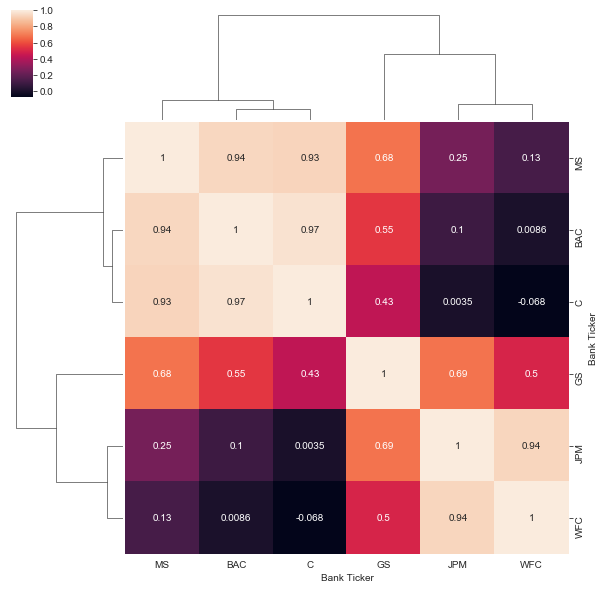

In [115]:
sns.clustermap(data=heat_map_df,annot=True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.